# Importing Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("/content/drive/MyDrive/Competitions/KDAG/train.csv")
df

,id,departure city,discount,price,no of items,location,class,segment,sub-class,delivery type,RID,profit,delivery date,address code,departure state,placement date
0,1,Houston,0.2,16.448,2,Central,kariox,Consumer,phone,Standard Class,7981,5.5512,2018-01-01,77095,Texas,2018-01-01
1,2,Westland,0.0,29.700,5,Central,kariox,Consumer,headset,Standard Class,6334,13.3650,2018-01-01,48185,Michigan,2018-01-01
2,3,Westland,0.0,14.730,3,Central,qexty,Consumer,shorts,Standard Class,6333,4.8609,2018-01-01,48185,Michigan,2018-01-01
3,4,Westland,0.0,43.920,3,Central,kariox,Consumer,television,Standard Class,6332,12.7368,2018-01-01,48185,Michigan,2018-01-01
4,5,Westland,0.0,66.580,2,Central,kariox,Consumer,laptop,Standard Class,6331,15.9792,2018-01-01,48185,Michigan,2018-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6695,6696,Burlington,0.0,542.940,3,East,kariox,Consumer,battery,Standard Class,9389,152.0232,2021-01-01,5408,Vermont,2021-01-01
6696,6697,San Jose,0.2,276.784,2,West,kariox,Corporate,headset,Standard Class,9597,89.9548,2021-01-01,95123,California,2021-01-01
6697,6698,Burlington,0.0,2.040,1,East,kariox,Consumer,watch,Standard Class,9390,0.9588,2021-01-01,5408,Vermont,2021-01-01
6698,6699,New York City,0.1,207.846,3,East,qexty,Corporate,tshirts,Second Class,440,2.3094,2021-01-01,10024,New York,2021-01-01


# Exploring Features

**Data Types**

In [2]:
df.dtypes

id                   int64
departure city      object
discount           float64
price              float64
no of items          int64
location            object
class               object
segment             object
sub-class           object
delivery type       object
RID                  int64
profit             float64
delivery date       object
address code         int64
departure state     object
placement date      object
dtype: object

**Ranges and Values**

In [3]:
df[['discount', 'price', 'no of items', 'RID', 'profit', 'address code']].describe()

,discount,price,no of items,RID,profit,address code
count,6700.000000,6700.000000,6700.000000,6700.000000,6700.000000,6700.000000
mean,0.155876,234.424275,3.798507,4954.381791,29.121046,54719.073284
std,0.205922,641.440815,2.225327,2921.304952,230.712951,32092.421012
min,0.000000,0.836000,1.000000,1.000000,-6599.978000,1040.000000
25%,0.000000,17.340000,2.000000,2389.750000,1.713750,22204.000000
50%,0.200000,54.960000,3.000000,4941.500000,8.803200,55113.000000
75%,0.200000,212.940000,5.000000,7507.250000,30.023400,90004.000000
max,0.800000,22638.480000,14.000000,9990.000000,8399.976000,99301.000000


In [4]:
discCol = ['departure city', 'location', 'class', 'segment', 'sub-class', 'delivery type', 'departure state']
for col in discCol:
  print(df[col].value_counts())
  print()

New York City       610
Los Angeles         538
Philadelphia        355
San Francisco       319
Houston             273
                   ... 
Goldsboro             1
Moorhead              1
North Charleston      1
Waukesha              1
Saint Peters          1
Name: departure city, Length: 469, dtype: int64

West       2118
East       1929
Central    1552
South      1101
Name: location, dtype: int64

kariox    4034
qexty     1437
fynota    1229
Name: class, dtype: int64

Consumer       3523
Corporate      2048
Home Office    1129
Name: segment, dtype: int64

headset       1025
phone          913
shorts         641
colddrinks     597
laptop         559
television     513
chocolates     502
tshirts        428
battery        303
tablet         250
hoodies        216
watch          185
lighting       155
pants          152
charger        131
sweets          83
fastfood        47
Name: sub-class, dtype: int64

Standard Class    4086
Second Class      1290
First Class        966
Same Day 

**NAN Values**

In [5]:
df.isnull().sum(), df.notnull().sum()

(id                 0
 departure city     0
 discount           0
 price              0
 no of items        0
 location           0
 class              0
 segment            0
 sub-class          0
 delivery type      1
 RID                0
 profit             0
 delivery date      0
 address code       0
 departure state    0
 placement date     0
 dtype: int64, id                 6700
 departure city     6700
 discount           6700
 price              6700
 no of items        6700
 location           6700
 class              6700
 segment            6700
 sub-class          6700
 delivery type      6699
 RID                6700
 profit             6700
 delivery date      6700
 address code       6700
 departure state    6700
 placement date     6700
 dtype: int64)

1 NAN Value, replacing with median

In [6]:
df['delivery type'] = df['delivery type'].fillna('Standard Class')
df['delivery type'].value_counts()

df.isnull().sum(), df.notnull().sum()

(id                 0
 departure city     0
 discount           0
 price              0
 no of items        0
 location           0
 class              0
 segment            0
 sub-class          0
 delivery type      0
 RID                0
 profit             0
 delivery date      0
 address code       0
 departure state    0
 placement date     0
 dtype: int64, id                 6700
 departure city     6700
 discount           6700
 price              6700
 no of items        6700
 location           6700
 class              6700
 segment            6700
 sub-class          6700
 delivery type      6700
 RID                6700
 profit             6700
 delivery date      6700
 address code       6700
 departure state    6700
 placement date     6700
 dtype: int64)

No Null values now

# Feature engineering

**Integer Encoding**

In [7]:
for col in discCol:
  valDict = df[col].value_counts().to_dict()
  num=0
  for i in valDict:
    valDict[i] = num
    num+=1
  
  df[col] = df[col].map(valDict)
df

,id,departure city,discount,price,no of items,location,class,segment,sub-class,delivery type,RID,profit,delivery date,address code,departure state,placement date
0,1,4,0.2,16.448,2,2,0,0,1,0,7981,5.5512,2018-01-01,77095,2,2018-01-01
1,2,83,0.0,29.700,5,2,0,0,0,0,6334,13.3650,2018-01-01,48185,8,2018-01-01
2,3,83,0.0,14.730,3,2,1,0,2,0,6333,4.8609,2018-01-01,48185,8,2018-01-01
3,4,83,0.0,43.920,3,2,0,0,5,0,6332,12.7368,2018-01-01,48185,8,2018-01-01
4,5,83,0.0,66.580,2,2,0,0,4,0,6331,15.9792,2018-01-01,48185,8,2018-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6695,6696,126,0.0,542.940,3,1,0,0,8,0,9389,152.0232,2021-01-01,5408,43,2021-01-01
6696,6697,24,0.2,276.784,2,0,0,1,0,0,9597,89.9548,2021-01-01,95123,0,2021-01-01
6697,6698,126,0.0,2.040,1,1,0,0,11,0,9390,0.9588,2021-01-01,5408,43,2021-01-01
6698,6699,0,0.1,207.846,3,1,1,1,7,1,440,2.3094,2021-01-01,10024,1,2021-01-01


**Splitting Dates**

In [8]:
dayNMonth = df['delivery date'].str.split(pat='-', expand=True)
df['deliveryDate'] = dayNMonth[2].astype(int)
df['deliveryMonth'] = dayNMonth[1].astype(int)
df['deliveryYear'] = dayNMonth[0].astype(int)

In [9]:
dayNMonth = df['placement date'].str.split(pat='-', expand=True)
df['placementDate'] = dayNMonth[2].astype(int)
df['placementMonth'] = dayNMonth[1].astype(int)
df['placementYear'] = dayNMonth[0].astype(int)

In [10]:
datecols = ['deliveryDate', 'deliveryMonth', 'deliveryYear', 'placementDate', 'placementMonth', 'placementYear']
for col in datecols:
  print(df[col].value_counts())
  print()

1    6700
Name: deliveryDate, dtype: int64

11    972
12    948
9     896
10    543
6     524
7     502
4     461
8     447
5     441
3     421
1     339
2     206
Name: deliveryMonth, dtype: int64

2020    2565
2019    2131
2018    1940
2021      64
Name: deliveryYear, dtype: int64

1    6700
Name: placementDate, dtype: int64

11    1015
12     944
9      923
10     515
8      492
5      490
7      482
6      475
4      465
3      456
1      251
2      192
Name: placementMonth, dtype: int64

2020    2580
2019    2102
2018    1993
2021      25
Name: placementYear, dtype: int64



Date seems to be 1 for all, so drop it. Also dropping id and original date columns.

In [11]:
df = df.drop(['deliveryDate', 'placementDate', 'delivery date', 'placement date', 'id'], axis=1)
print(df.dtypes)

departure city       int64
discount           float64
price              float64
no of items          int64
location             int64
class                int64
segment              int64
sub-class            int64
delivery type        int64
RID                  int64
profit             float64
address code         int64
departure state      int64
deliveryMonth        int64
deliveryYear         int64
placementMonth       int64
placementYear        int64
dtype: object


**Final Cleaned Data**

In [12]:
df = df[[ 'discount', 'price', 'no of items','RID','address code','departure city', 'location',
       'class', 'segment', 'sub-class', 'delivery type',  
        'departure state', 'deliveryMonth', 'deliveryYear',
       'placementMonth', 'placementYear','profit']]
df

,discount,price,no of items,RID,address code,departure city,location,class,segment,sub-class,delivery type,departure state,deliveryMonth,deliveryYear,placementMonth,placementYear,profit
0,0.2,16.448,2,7981,77095,4,2,0,0,1,0,2,1,2018,1,2018,5.5512
1,0.0,29.700,5,6334,48185,83,2,0,0,0,0,8,1,2018,1,2018,13.3650
2,0.0,14.730,3,6333,48185,83,2,1,0,2,0,8,1,2018,1,2018,4.8609
3,0.0,43.920,3,6332,48185,83,2,0,0,5,0,8,1,2018,1,2018,12.7368
4,0.0,66.580,2,6331,48185,83,2,0,0,4,0,8,1,2018,1,2018,15.9792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6695,0.0,542.940,3,9389,5408,126,1,0,0,8,0,43,1,2021,1,2021,152.0232
6696,0.2,276.784,2,9597,95123,24,0,0,1,0,0,0,1,2021,1,2021,89.9548
6697,0.0,2.040,1,9390,5408,126,1,0,0,11,0,43,1,2021,1,2021,0.9588
6698,0.1,207.846,3,440,10024,0,1,1,1,7,1,1,1,2021,1,2021,2.3094


In [13]:
contCols = ['discount', 'price', 'no of items','RID','address code']
discCols = ['departure city', 'location', 'class', 'segment', 'sub-class', 'delivery type', 'departure state', 'deliveryMonth', 'deliveryYear','placementMonth', 'placementYear','profit']

# Plots

**Histograms:**

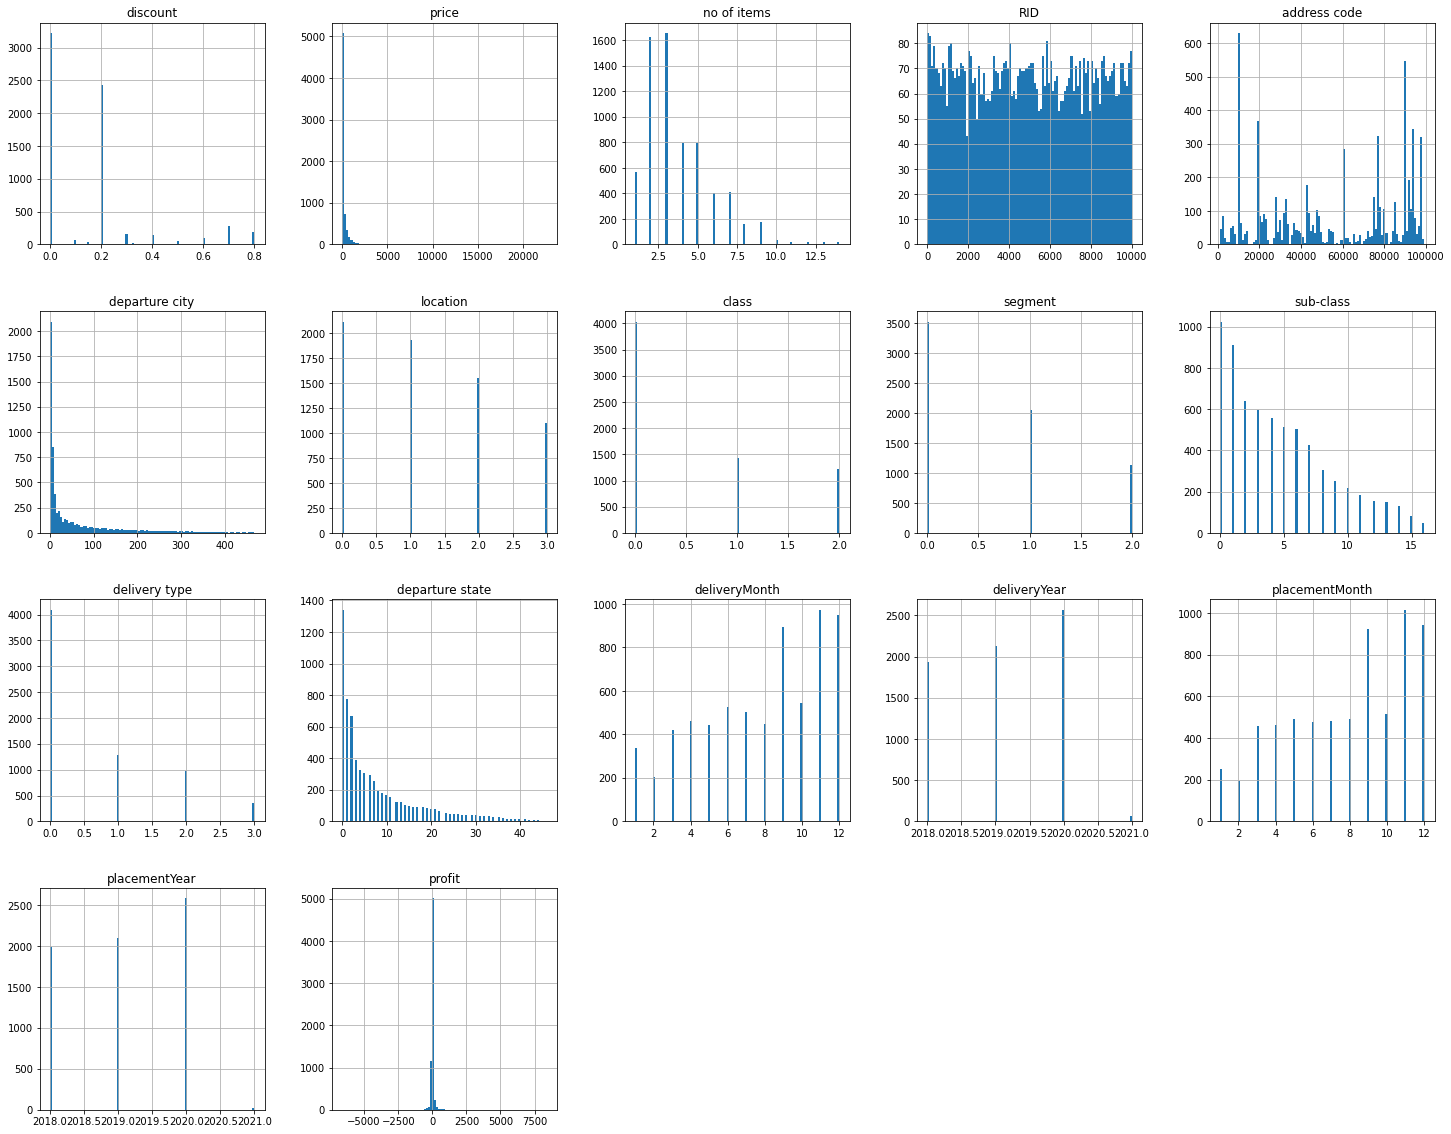

In [14]:
hist = df.hist(bins=100,figsize=(25,20), layout=(4,5))

**Correlation Matrix**

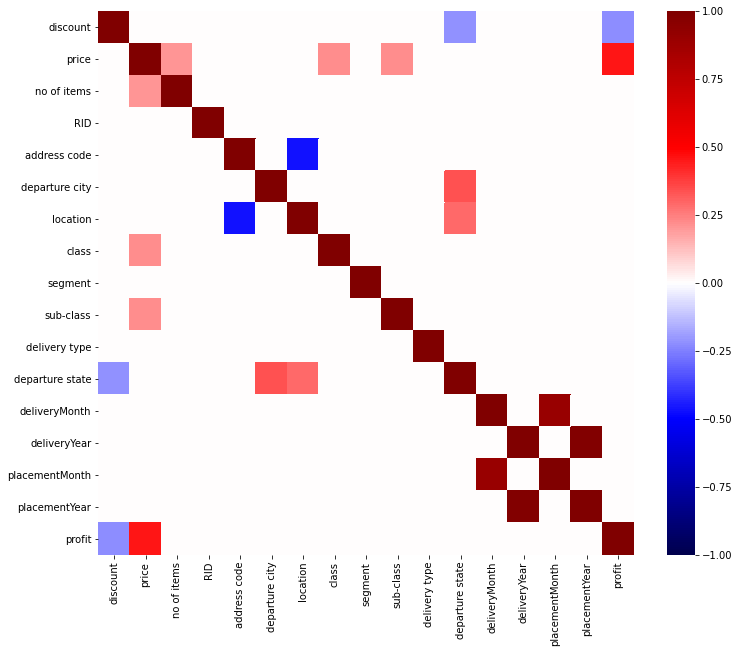

In [15]:
import seaborn as sns
from matplotlib.pyplot import cm
corr = df.corr()
for col in corr.columns:
  corr.loc[(corr[col] < 0.2) & (corr[col] > -0.2), col] = 0
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(corr,cmap = cm.seismic , vmin=-1, vmax=1, ax=ax)

**Dropping RID and Address Code**

In [16]:
data = df.drop(['RID', 'address code'], axis=1)
data.columns

Index(['discount', 'price', 'no of items', 'departure city', 'location',
       'class', 'segment', 'sub-class', 'delivery type', 'departure state',
       'deliveryMonth', 'deliveryYear', 'placementMonth', 'placementYear',
       'profit'],
      dtype='object')

**Price-Profit-Discount**

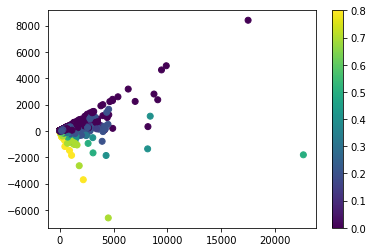

In [17]:
plt.scatter(data['price'], data['profit'], c=data['discount'])
plt.colorbar()

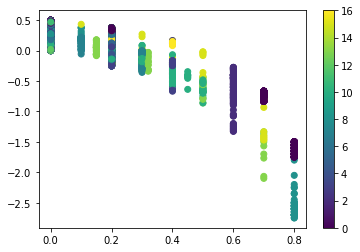

In [18]:
plt.scatter(data['discount'], data['profit']/data['price'], c=data['sub-class'])
plt.colorbar()

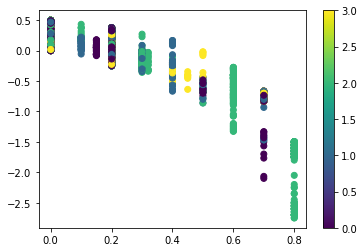

In [19]:
plt.scatter(data['discount'], data['profit']/data['price'], c=data['location'])
plt.colorbar()

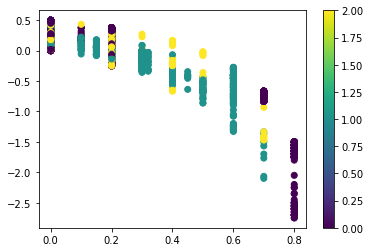

In [20]:
plt.scatter(data['discount'], data['profit']/data['price'], c=data['class'])
plt.colorbar()

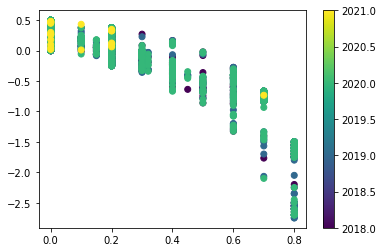

In [21]:
plt.scatter(data['discount'], data['profit']/data['price'], c=data['placementYear'])
plt.colorbar()

Price and Profit have a linear relationship based on some coefficient which seems to be dependent on discount and sub-class.

Adding column for Profit/Price

In [22]:
data['coeff'] = data['profit']/data['price']

In [23]:
data.corr()['coeff']

discount          -0.864469
price              0.001169
no of items        0.000730
departure city     0.006236
location          -0.134031
class             -0.018563
segment            0.029813
sub-class          0.034289
delivery type      0.021786
departure state    0.148687
deliveryMonth      0.003726
deliveryYear       0.011810
placementMonth     0.000137
placementYear      0.012515
profit             0.224378
coeff              1.000000
Name: coeff, dtype: float64

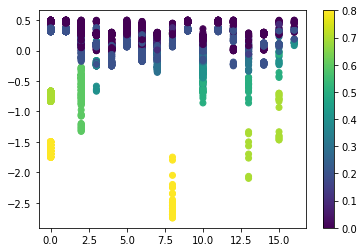

In [24]:
plt.scatter(data['sub-class'], data['coeff'], c=data['discount'])
plt.colorbar()

In [25]:
data['discount'].value_counts()

0.00    3220
0.20    2437
0.70     281
0.80     193
0.30     159
0.40     137
0.60      99
0.10      68
0.50      47
0.15      36
0.32      16
0.45       7
Name: discount, dtype: int64

Sub-class, location, price, class and discount seem to predict coeff

**Discrete Cols violins**

In [26]:
discCols = ['no of items', 'location', 'class', 'segment', 'sub-class', 'delivery type', 'deliveryMonth', 'deliveryYear','placementMonth', 'placementYear']

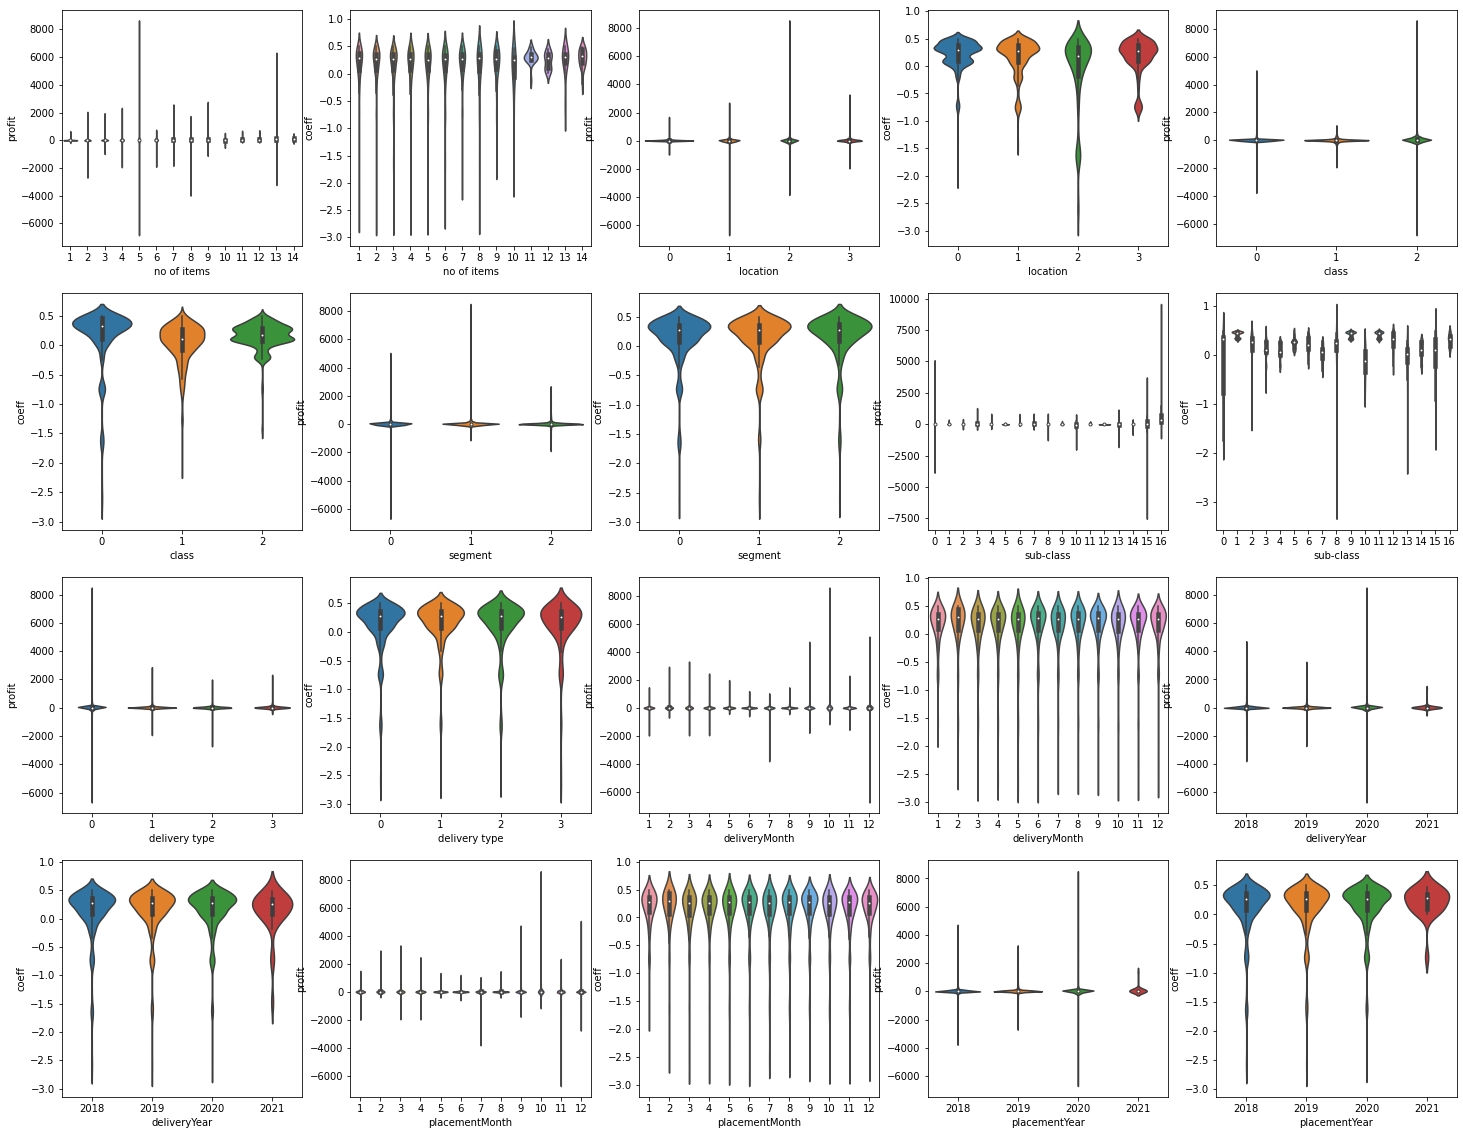

In [27]:
fig, ax = plt.subplots(nrows=4, ncols=5, figsize=(25,20))
i=0
for cols in discCols:
  sns.violinplot(y=data['profit'],x= data[cols], ax=ax[i//5][i%5])
  i+=1
  sns.violinplot(y=data['coeff'],x= data[cols], ax=ax[i//5][i%5])
  i+=1
plt.show()

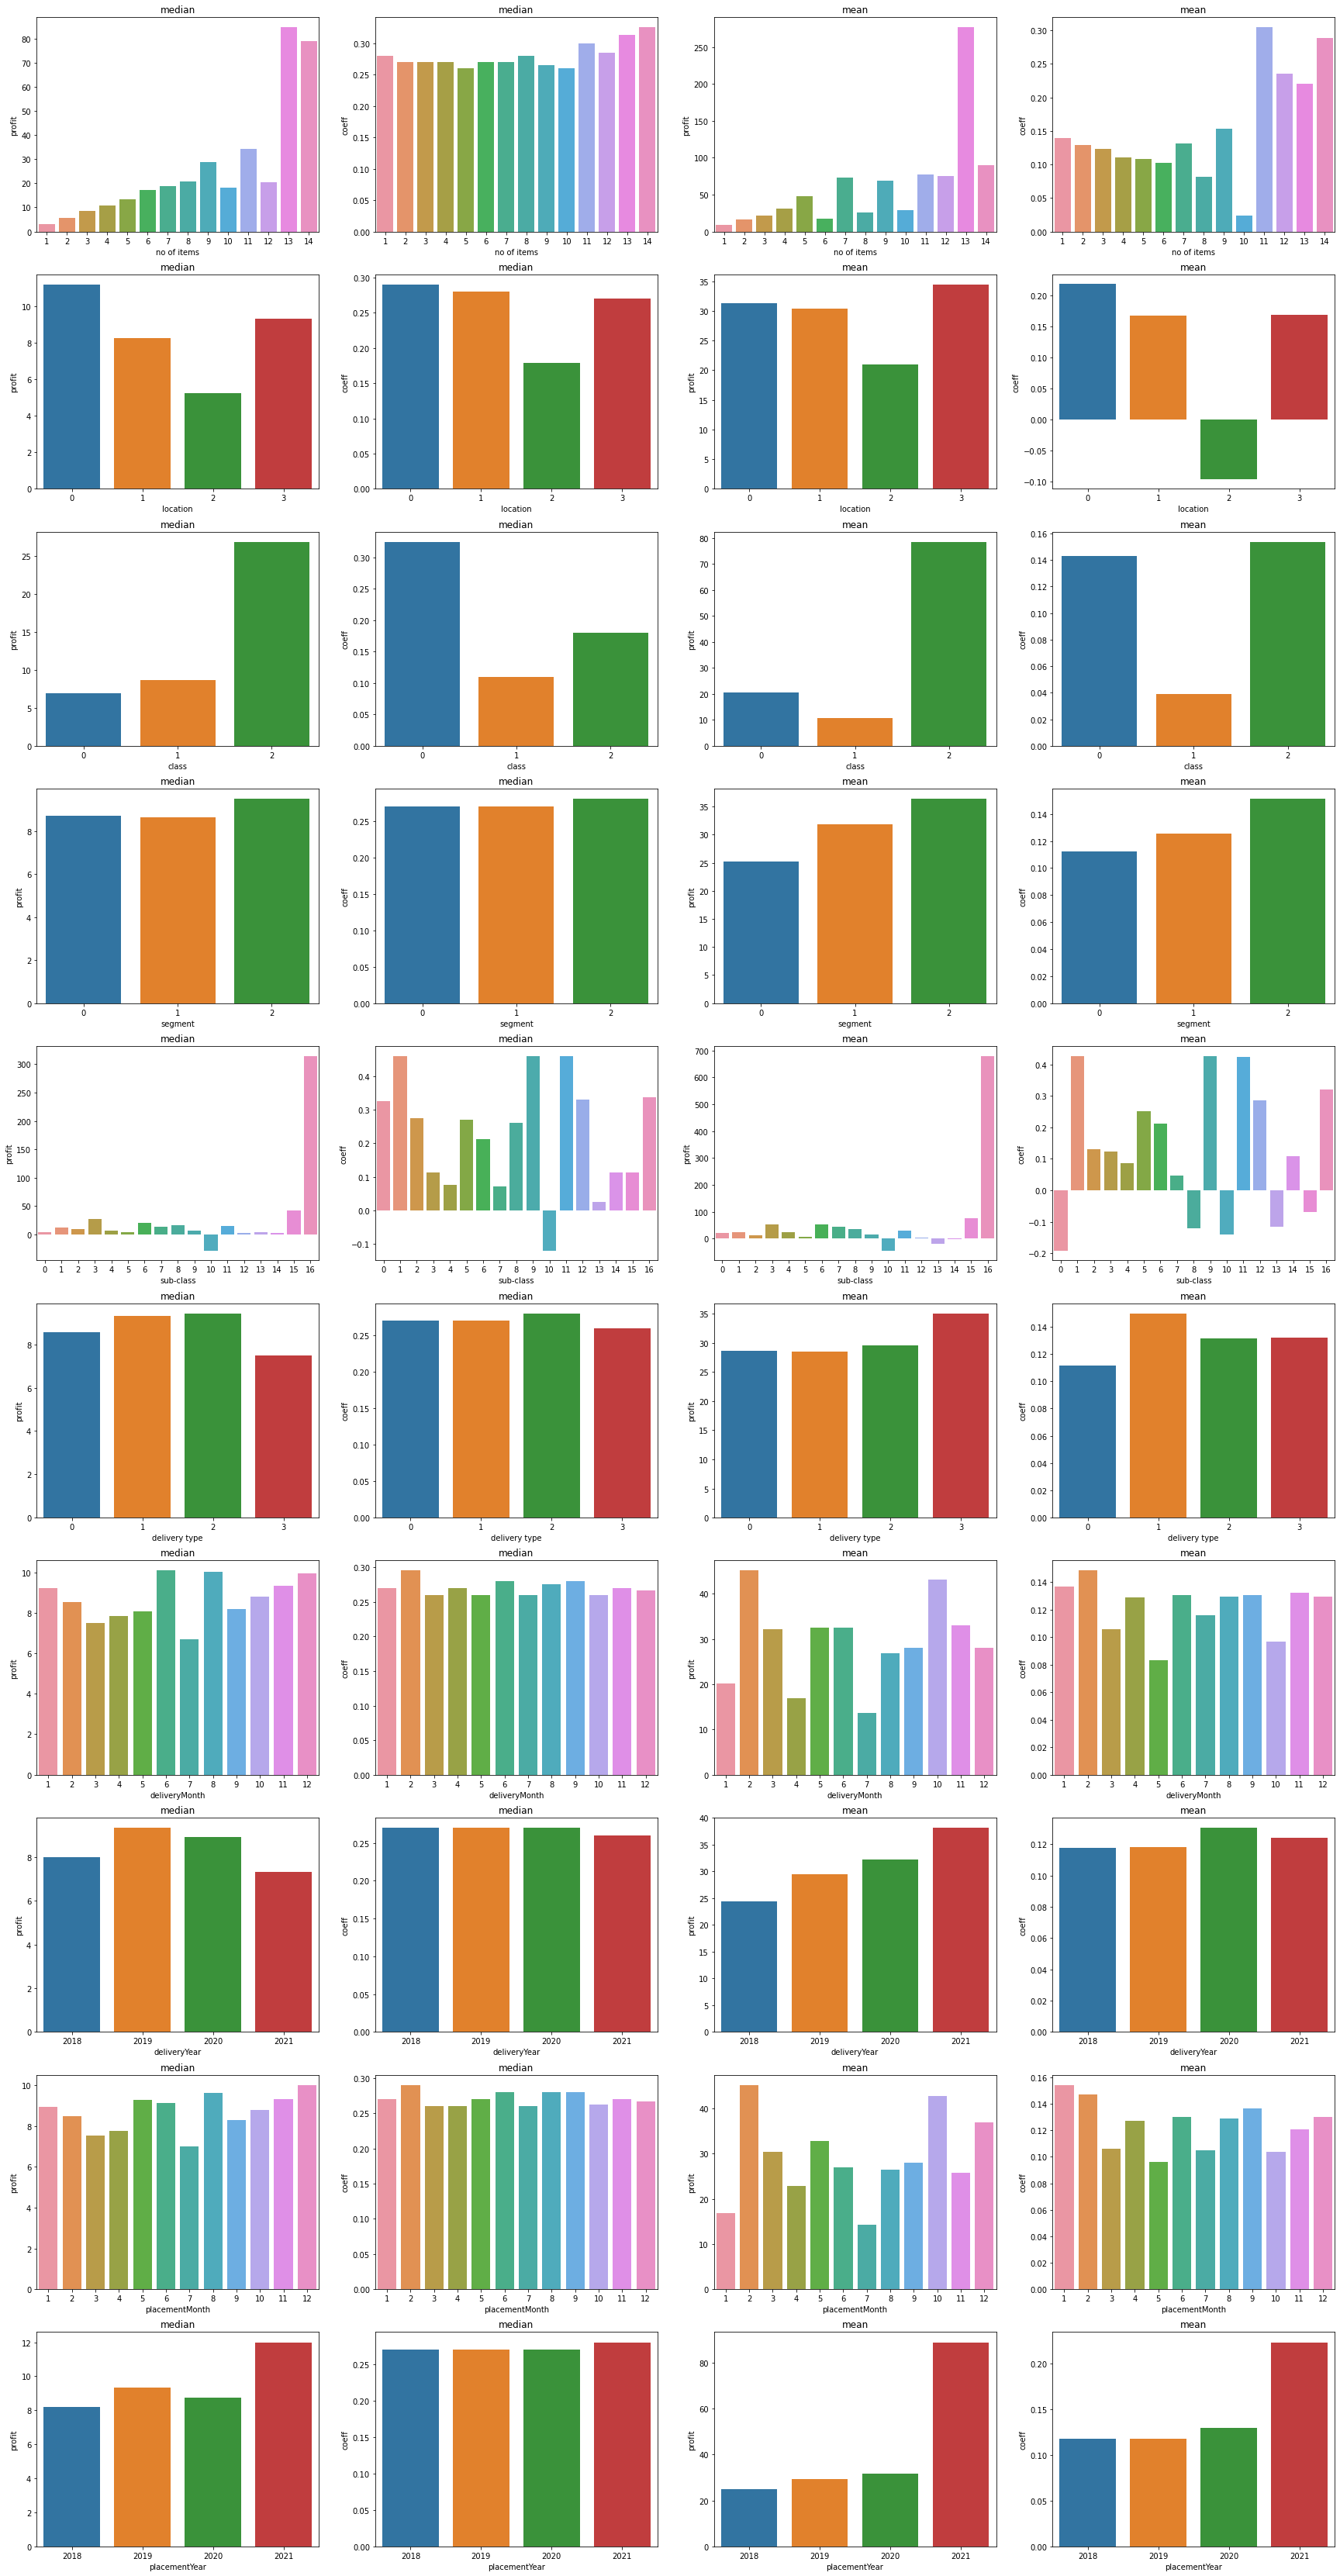

In [28]:
fig, ax = plt.subplots(nrows=10, ncols=4, figsize=(30,60))
i=0
for cols in discCols:
  medians = data[[cols, 'profit', 'coeff']].groupby(cols).median()
  sns.barplot(y=medians['profit'],x= medians.index, ax=ax[i//4][i%4]).set_title('median')
  i+=1
  sns.barplot(y=medians['coeff'],x=medians.index, ax=ax[i//4][i%4]).set_title('median')
  i+=1
  medians = data[[cols, 'profit', 'coeff']].groupby(cols).mean()
  sns.barplot(y=medians['profit'],x= medians.index, ax=ax[i//4][i%4]).set_title('mean')
  i+=1
  sns.barplot(y=medians['coeff'],x=medians.index, ax=ax[i//4][i%4]).set_title('mean')
  i+=1
plt.show()

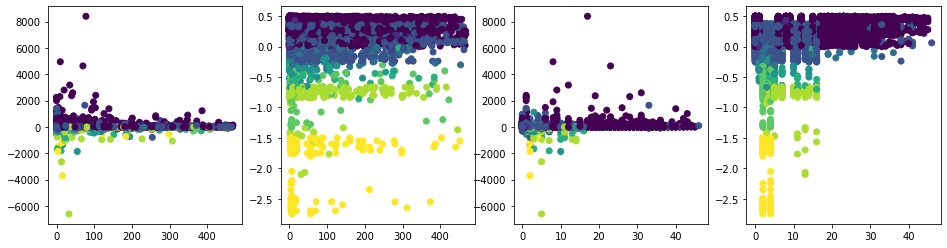

In [62]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(16,4))
ax[0].scatter(data['departure city'], data['profit'], c=data['discount'])
ax[1].scatter(data['departure city'], data['coeff'], c=data['discount'])
ax[2].scatter(data['departure state'], data['profit'], c=data['discount'])
ax[3].scatter(data['departure state'], data['coeff'], c=data['discount'])

In [106]:
means = data[['departure state', 'profit', 'coeff']].groupby('departure state').mean()
meanscity = data[['departure city', 'profit', 'coeff']].groupby('departure city').mean()

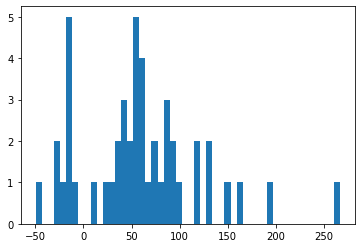

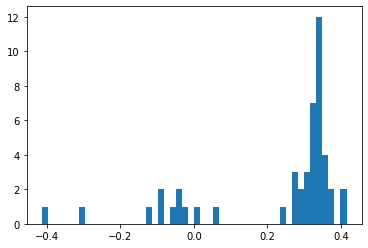

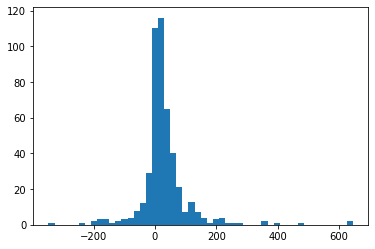

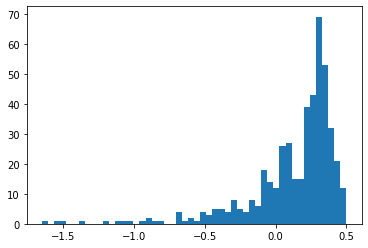

In [107]:
plt.hist(means['profit'], bins=50)
plt.show()
plt.hist(means['coeff'], bins=50)
plt.show()
plt.hist(meanscity['profit'], bins=50)
plt.show()
plt.hist(meanscity['coeff'], bins=50)
plt.show()

In [108]:
avgProfDict = means['profit'].to_dict()
data['StateAvgProfit'] = data['departure state'].map(avgProfDict)

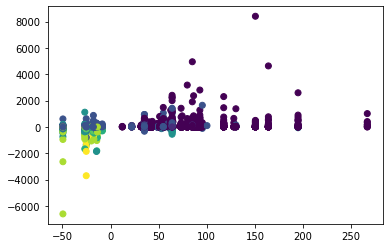

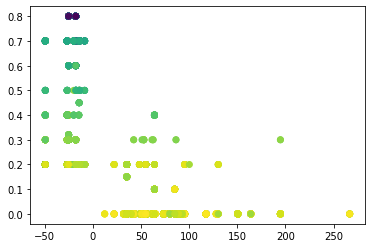

In [109]:
plt.scatter(data['StateAvgProfit'], data['profit'], c=data['discount'])
plt.show()
plt.scatter(data['StateAvgProfit'], data['discount'], c=data['coeff'])

In [110]:
avgProfDictCity = meanscity['profit'].to_dict()
data['CityAvgProfit'] = data['departure city'].map(avgProfDictCity)

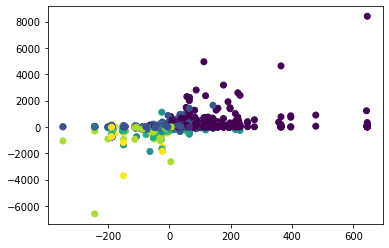

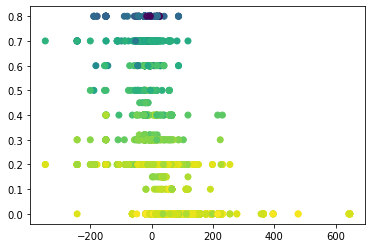

In [111]:
plt.scatter(data['CityAvgProfit'], data['profit'], c=data['discount'])
plt.show()
plt.scatter(data['CityAvgProfit'], data['discount'], c=data['coeff'])

In [113]:
for i in avgProfDict:
  if(avgProfDict[i]<0):
    avgProfDict[i] = -1
  elif(avgProfDict[i]>100):
    avgProfDict[i] = 1
  else:
    avgProfDict[i] = 0

In [114]:
data['StateAvgInd'] = data['departure state'].map(avgProfDict)

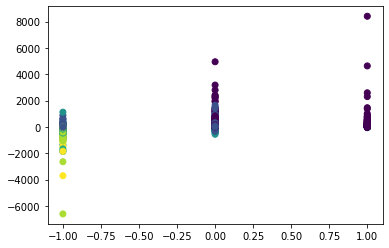

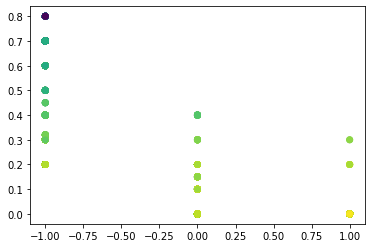

In [115]:
plt.scatter(data['StateAvgInd'], data['profit'], c=data['discount'])
plt.show()
plt.scatter(data['StateAvgInd'], data['discount'], c=data['coeff'])

Three new features added

Good Feature - discount, price, location, class, sub-class, profit, coeff, stateindex

Medium Features- no of items, dep city, segment, delivery type, dep state, month, year, stateavg, cityavg

In [116]:
data['profit'].describe()

count    6700.000000
mean       29.121046
std       230.712951
min     -6599.978000
25%         1.713750
50%         8.803200
75%        30.023400
max      8399.976000
Name: profit, dtype: float64